## Sentiment Analysis (Flair)

In [51]:
from textblob import TextBlob
from wordcloud import WordCloud
import flair
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', None)

In [52]:
#Extend column width to see entire text & load dataset
pd.set_option('max_colwidth', None)
data_raw = pd.read_csv('Dec28toJan03_Clean.csv')
data_raw.head()

,Date,ID,lang,Tweet,Original Tweet
0,2021-01-03T19:20:59.000Z,1345812421676576768,en,mkbhd step 2 buy eth sub 1k step 3 outperform btcagain,@MKBHD Step 2: buy $ETH sub $1k\n\nStep 3: outperform $BTC...again.
1,2021-01-03T19:20:59.000Z,1345812421600940032,en,rt naturalmed777 think xrp xlm bigger people realize many stablecoins quietly built stellarxlm,RT @Naturalmed777: I think $XRP $XLM are bigger than what most people realize.\n\nHow many stablecoins were quietly built on Stellar/XLM in t…
2,2021-01-03T19:20:59.000Z,1345812421584285698,en,rt sheresed69 new toy subscribe onlyfans see squirt link bio httpstcox6ga8zbroo,RT @Sheresed69: New toy 😍😍 subscribe to my onlyfans to see me squirt 🥰\nLink in bio 🤑 https://t.co/x6Ga8ZBrOO
3,2021-01-03T19:20:59.000Z,1345812420955144197,en,rt tokengoodguy0 digibyte dgb likely move faster bitcoin btc people realize undervalued secure faster,"RT @TokenGoodGuy0: .\n#Digibyte $dgb likely to move faster than #Bitcoin $btc when people realize it is undervalued, secure and faster\n\nIf D…"
4,2021-01-03T19:20:59.000Z,1345812420783206401,en,rt nixtetic use comp remote commission work halt crash often know stop working woul,"RT @nixtetic: I use my comp. for remote and commission work, but it halts and crashes so often that I know it will stop working, and I woul…"


In [ ]:
#Pass original data to new variable to store if we ned to reload the dataset
data = data_raw

In [53]:
#Load English classifer
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-01-03 19:50:55,298 loading file C:\Users\jwkon\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [54]:
#Positive control
pos_sentence = flair.data.Sentence("I do agree, I think we will do well.")
sentiment_model.predict(pos_sentence)
pos_sentence

Sentence: "I do agree , I think we will do well ."   [− Tokens: 11  − Sentence-Labels: {'label': [POSITIVE (0.9858)]}]

In [55]:
#Negative control
neg_sentence = flair.data.Sentence("I absolutely disagree, I think you're wrong")
sentiment_model.predict(neg_sentence)
neg_sentence

Sentence: "I absolutely disagree , I think you 're wrong"   [− Tokens: 9  − Sentence-Labels: {'label': [NEGATIVE (0.6646)]}]

In [56]:
#Start Sentiment Analysis

In [58]:
# we will append probability and sentiment preds later
probs = []
sentiments = []



for tweet in data['Tweet'].to_list():
    # make prediction
    sentence = flair.data.Sentence(tweet)
    sentiment_model.predict(sentence)
    # extract sentiment prediction
    probs.append(sentence.labels[0].score)  # numerical score 0-1
    sentiments.append(sentence.labels[0].value)  # 'POSITIVE' or 'NEGATIVE'

# add probability and sentiment predictions to tweets dataframe
data['probability'] = probs
data['sentiment'] = sentiments

Exception ignored in: <function tqdm.__del__ at 0x000001A6F262F678>
Traceback (most recent call last):
  File "C:\Users\jwkon\anaconda3\envs\Sentiment\lib\site-packages\tqdm\std.py", line 1135, in __del__
    self.close()
  File "C:\Users\jwkon\anaconda3\envs\Sentiment\lib\site-packages\tqdm\notebook.py", line 288, in close
    self.disp(bar_style='danger')
AttributeError: 'tqdm' object has no attribute 'disp'


In [59]:
#Preview dataframe
data.head()

,Date,ID,lang,Tweet,Original Tweet,probability,sentiment
0,2021-01-03T19:20:59.000Z,1345812421676576768,en,mkbhd step 2 buy eth sub 1k step 3 outperform btcagain,@MKBHD Step 2: buy $ETH sub $1k\n\nStep 3: outperform $BTC...again.,0.955776,NEGATIVE
1,2021-01-03T19:20:59.000Z,1345812421600940032,en,rt naturalmed777 think xrp xlm bigger people realize many stablecoins quietly built stellarxlm,RT @Naturalmed777: I think $XRP $XLM are bigger than what most people realize.\n\nHow many stablecoins were quietly built on Stellar/XLM in t…,0.874341,NEGATIVE
2,2021-01-03T19:20:59.000Z,1345812421584285698,en,rt sheresed69 new toy subscribe onlyfans see squirt link bio httpstcox6ga8zbroo,RT @Sheresed69: New toy 😍😍 subscribe to my onlyfans to see me squirt 🥰\nLink in bio 🤑 https://t.co/x6Ga8ZBrOO,0.830131,NEGATIVE
3,2021-01-03T19:20:59.000Z,1345812420955144197,en,rt tokengoodguy0 digibyte dgb likely move faster bitcoin btc people realize undervalued secure faster,"RT @TokenGoodGuy0: .\n#Digibyte $dgb likely to move faster than #Bitcoin $btc when people realize it is undervalued, secure and faster\n\nIf D…",0.877802,POSITIVE
4,2021-01-03T19:20:59.000Z,1345812420783206401,en,rt nixtetic use comp remote commission work halt crash often know stop working woul,"RT @nixtetic: I use my comp. for remote and commission work, but it halts and crashes so often that I know it will stop working, and I woul…",0.999274,NEGATIVE


NEGATIVE    4820
POSITIVE    4283
Name: sentiment, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


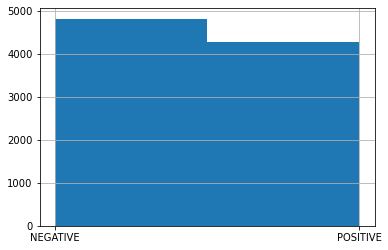

In [60]:
#View value counts for sentiment results
print(data['sentiment'].value_counts())
#View distribution freq of sentiment results
print(data['sentiment'].hist(bins=2))

In [61]:
#Save cleaned dataframe to csv for analysis
data.to_csv('Dec28toJan03(Flair).csv', index = False)